In [1]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
import pandas as pd
from fastparquet import ParquetFile
from sklearn.metrics import  roc_auc_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

import pandas as pd
from fastparquet import ParquetFile
import numpy as np

import shap
from utils import feature_drop, remove_highly_correlated_features, get_shap_feature, get_categorical_columns

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#A115FE", "#8F00FF", "#4d0585", "#591878", "#6e1f78", "#7b469c", "#2c0652",
          "#29AB50", "#22753b", "#ECE919", "#7a781d", "#0F91D0", "#0f3f75"]
sns.set_palette(sns.color_palette(colors))

'nlp' extra dependecy package 'gensim' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'gensim' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.


c:\Users\Александр\Desktop\УЧЕБА\ХАКАТОНЫ\IT Purple Hack\purple_hack\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Александр\Desktop\УЧЕБА\ХАКАТОНЫ\IT Purple Hack\purple_hack\venv\Lib\site-packages\lightautoml\ml_algo\dl_model.py:42: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
c:\Users\Александр\Desktop\УЧЕБА\ХАКАТОНЫ\IT Purple Hack\purple_hack\venv\Lib\site-packages\lightautoml\text\embed.py:22: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
c:\Users\Александр\Desktop\УЧЕБА\ХАКАТОНЫ\IT Purple Hack\purple_hack\venv\Lib\site-packages\lightautoml\text\dl_transformers.py:25: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - packa

In [2]:
file_path = "Data/train_ai_comp_final_dp.parquet"
pf = ParquetFile(file_path)
df = pf.to_pandas()
df = feature_drop(df)
df.head()

,id,target,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,0,0,1761,1759,85,105469,191,46,0,6,...,28913,48985,84264,12045,12107,12510,21126,28913,48985,84264
1,1,0,1761,1759,120,105610,144,71,0,135,...,0,0,0,0,0,0,0,0,0,0
2,2,0,890,1759,141,105227,191,11,0,0,...,55949,70006,113317,33735,31242,12691,48682,55949,70006,113317
5,5,0,1599,966,30,102441,191,8,0,0,...,0,6872,8530,0,0,0,0,0,6872,8530
6,6,0,1761,1759,85,104006,191,2,0,0,...,0,0,7642,0,0,0,0,0,0,7642


In [3]:
X = df.drop(columns=["target", "id"])
y = df["target"]

In [4]:
X = df.drop(columns=['target', "id"])
y = df['target']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [5]:
classifiers = [
    lgb.LGBMClassifier(n_estimators=50, random_state=42, max_depth=8, learning_rate=0.01),
    XGBClassifier(n_estimators=50, random_state=42, max_depth=8, learning_rate=0.01),
    CatBoostClassifier(iterations=50, learning_rate=0.01, depth=8, loss_function='Logloss', verbose=500)
]
shap_df  = get_shap_feature(X_train, y_train, X_test, classifiers)


c:\Users\Александр\Desktop\УЧЕБА\ХАКАТОНЫ\IT Purple Hack\purple_hack\venv\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


0:	learn: 0.6777154	total: 515ms	remaining: 25.2s
49:	learn: 0.2795179	total: 21.9s	remaining: 0us


In [6]:
shap_df.sort_values(by="shap_importance", ascending=False)

,feature,shap_importance
574,feature994,4.288690e-02
203,feature341,2.483448e-02
192,feature319,2.418532e-02
6,feature1004,2.386159e-02
560,feature954,1.294682e-02
...,...,...
324,feature51,3.749350e-07
165,feature27,2.174389e-07
523,feature910,2.006125e-07
507,feature889,1.438104e-07


In [7]:
feature = shap_df["feature"].values
X_test, X_train= X_test[feature], X_train[feature]
without_drop = shap_df.sort_values(by = "shap_importance", ascending = False)["feature"].head(10)
columns_to_remove = remove_highly_correlated_features(X_train.drop(columns=without_drop.values), shap_df, threshold=0.9)
X_train, X_val, X_test = X_train.drop(columns=columns_to_remove), X_val.drop(columns=columns_to_remove), X_test.drop(columns=columns_to_remove)
category = get_categorical_columns(X_train)

In [8]:
feature_final = X_train.columns

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
validate = pd.concat([X_val, y_val], axis=1)

In [ ]:
task = Task('binary', metric='auc')

tuning_params = {
    'max_tuning_time': 3600,  # Максимальное время тюнинга в секундах
    'max_tuning_iter': 1000,   # Максимальное количество итераций тюнинга
    # Другие параметры тюнинга по необходимости
}

# Настройка AutoML
automl = TabularAutoML(
    task=task,
    timeout=3600 * 3,  # Установите желаемое время в секундах
    cpu_limit=4,
    memory_limit=16,  # Установите лимит памяти в GB
    gpu_ids='1',  # Используйте GPU для ускорения (если доступно)
    reader_params={'cv': 5, 'random_state': 42},
    general_params={'use_algos': [['linear_l2', 'lgb', 'lgb_tuned', 'catboost', 'catboost_tuned', 'xgboost']]},
    tuning_params=tuning_params
)

# Определение ролей
roles = {
    'target': 'target',
    'category': category,  # Пример для категориальных признаков
}

oof_pred = automl.fit_predict(train, roles=roles, valid_data=validate)


NameError: name 'Task' is not defined

In [ ]:
import pickle

#Сохранение модели
with open('automl_model.pkl', 'wb') as f:
    pickle.dump(automl, f)


with open('automl_model.pkl', 'rb') as f:
    loaded_automl = pickle.load(f)


In [ ]:
predict = loaded_automl.predict(X_val)
predict.data[:, 0]

array([0.01373336, 0.00944947, 0.01396201, ..., 0.13669124, 0.02250035,
       0.03463944], dtype=float32)

In [36]:
y_train_pred = loaded_automl.predict(X_train).data[:, 0]
y_val_pred = loaded_automl.predict(X_val).data[:, 0]

predictions = np.where(y_val_pred > 0.05, 1, 0)

roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_val, y_val_pred)
print(f"roc-auc train {roc_auc_train}")
print(f"roc-auc test {roc_auc_test}")
print(classification_report(y_val, predictions))

roc-auc train 0.8892989562632411
roc-auc test 0.7560727973475214
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     25016
           1       0.10      0.51      0.17       965

    accuracy                           0.82     25981
   macro avg       0.54      0.67      0.53     25981
weighted avg       0.95      0.82      0.87     25981



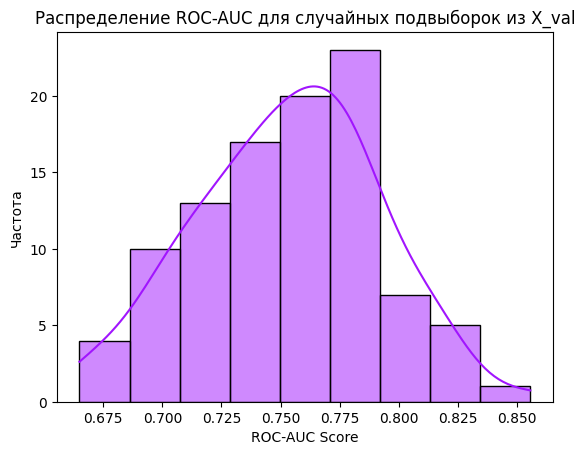

5-й квантиль: 0.690348131001246
95-й квантиль: 0.8139387181858744


In [37]:
seed = 42
rng = np.random.RandomState(seed)

roc_auc_scores = []

for _ in range(100):  # Повторяем 100 раз
    # Выбираем случайные 1000 элементов из X_val и соответствующие метки y_val с помощью созданного генератора
    sample_indices = rng.choice(X_test.index, size=1000, replace=False)
    X_val_sample = X_test.loc[sample_indices]
    y_val_sample = y_test.loc[sample_indices]
    
    # Выполняем предсказание для выборки
    y_pred_sample = loaded_automl.predict(X_val_sample).data[:, 0]
    
    # Вычисляем roc_auc и добавляем в список
    roc_auc = roc_auc_score(y_val_sample, y_pred_sample)
    roc_auc_scores.append(roc_auc)

# Визуализация распределения roc_auc с помощью гистограммы
sns.histplot(roc_auc_scores, kde=True)
plt.title('Распределение ROC-AUC для случайных подвыборок из X_val')
plt.xlabel('ROC-AUC Score')
plt.ylabel('Частота')
plt.show()

# Вычисление 5-го и 95-го квантилей
quantile_5 = np.percentile(roc_auc_scores, 5)
quantile_95 = np.percentile(roc_auc_scores, 95)

print(f"5-й квантиль: {quantile_5}")
print(f"95-й квантиль: {quantile_95}")

In [38]:
loaded_automl.get_feature_scores().head(20)

,Feature,Importance
0,feature994,21942.120573
1,feature1004,16681.190608
2,feature954,13650.978274
3,feature319,13489.615556
4,feature341,10244.438960
5,feature940,9192.182395
6,feature320,7817.141413
7,feature357,7071.866068
8,feature950,7030.367928
9,feature356,6913.686033


In [41]:
y_train_pred = loaded_automl.predict(X_train).data[:, 0]
y_val_pred = loaded_automl.predict(X_test).data[:, 0]

predictions = np.where(y_val_pred > 0.05, 1, 0)

roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_val_pred)
print(f"roc-auc train {roc_auc_train}")
print(f"roc-auc test {roc_auc_test}")
print(classification_report(y_test, predictions))

roc-auc train 0.8892989562632411
roc-auc test 0.7550092604046477
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     25055
           1       0.10      0.52      0.17       926

    accuracy                           0.81     25981
   macro avg       0.54      0.67      0.53     25981
weighted avg       0.95      0.81      0.87     25981



In [46]:
file_path = "Data/test_sber.parquet"
pf = ParquetFile(file_path)
df = pf.to_pandas()

In [49]:
id = df["id"].values
df = df[feature_final]
y_pred = loaded_automl.predict(df).data[:, 0]
predictions = np.where(y_pred > 0.03, 1, 0)

In [54]:
len(y_pred), len(predictions), len(id)

(173433, 173433, 173433)

In [55]:
submit = pd.DataFrame({
    "id": id,
    "target_bin":predictions,
    "target_prob": y_pred
})
submit

,id,target_bin,target_prob
0,3,0,0.026040
1,4,0,0.020900
2,12,1,0.057360
3,16,0,0.009455
4,20,1,0.056118
...,...,...,...
173428,693043,1,0.133050
173429,693044,1,0.077361
173430,693045,1,0.109113
173431,693046,1,0.236513


In [56]:
submit.to_csv("submit.csv", index=False)

In [10]:
import pickle
with open('automl_model_0.769.pkl', 'rb') as f:
    loaded_automl = pickle.load(f)

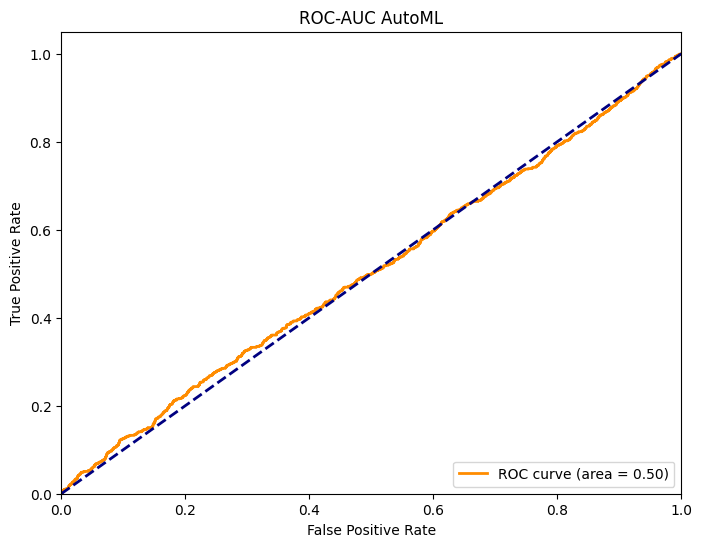

In [11]:
predict = loaded_automl.predict(X_test)
y_scores = predict.data[:, 0] 

# Расчет FPR, TPR, и пороговых значений
fpr, tpr, thresholds = roc_curve(y_val, y_scores)

# Расчет площади под кривой (AUC)
roc_auc = auc(fpr, tpr)

# Построение графика ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC AutoML')
plt.legend(loc="lower right")
plt.show()

In [12]:
predict

array([[0.07226277],
       [0.00790166],
       [0.01789437],
       ...,
       [0.0119266 ],
       [0.08247656],
       [0.01393619]], dtype=float32)